### VIST Dataset exploration

In [1]:
import json
import numpy as np
import os
import torch
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image
import clip
import torch.nn.functional as F 
from collections import Counter

torch.set_printoptions(precision=5)
np.set_printoptions(precision=3)

# Specify the path to your JSON file
json_file_path_dii_train = 'C:/Users/admitos/Desktop/ThesisUU/DII-annotation/train.description-in-isolation.json'
json_file_path_dii_val = 'C:/Users/admitos/Desktop/ThesisUU/DII-annotation/val.description-in-isolation.json'
json_file_path_dii_test = 'C:/Users/admitos/Desktop/ThesisUU/DII-annotation/test.description-in-isolation.json'

# Read the JSON file
with open(json_file_path_dii_train, 'r') as file:
    DII_train = json.load(file)

# Read the JSON file
with open(json_file_path_dii_val, 'r') as file:
    DII_val = json.load(file)

# Read the JSON file
with open(json_file_path_dii_test, 'r') as file:
    DII_test = json.load(file)

In [3]:
mykeys_dii = DII_train.keys()
print("Keys of the dictionary: ", mykeys_dii)
dii_annotations_train = DII_train['annotations']
dii_annotations_val = DII_val['annotations']
dii_annotations_test = DII_test['annotations']
dii_images_train = DII_train['images']
dii_albums_train = DII_train['albums']
print(dii_images_train[0])
print(dii_albums_train[0])
print(dii_annotations_train[4])
print(dii_images_train[0].keys())
print(dii_annotations_train[0][0].keys())

Keys of the dictionary:  dict_keys(['images', 'info', 'albums', 'type', 'annotations'])
{'datetaken': '2008-06-30 07:33:43', 'license': '5', 'title': 'Moreton Bay Fig 1877', 'text': '', 'album_id': '72157605930515606', 'longitude': '-119.692879', 'url_o': 'https://farm3.staticflickr.com/2078/2626977325_2b7696990c_o.jpg', 'secret': 'bec0ff3596', 'media': 'photo', 'latitude': '34.414760', 'id': '2626977325', 'tags': 'santabarbara'}
{'description': 'Believed to be the largest Moreton Bay Fig Tree in the united States', 'title': 'Moreton Bay Fig 1877', 'farm': '4', 'date_update': '1432330952', 'primary': '2626985925', 'server': '3104', 'date_create': '1214980972', 'photos': '13', 'secret': '98149cd59b', 'owner': '12806074@N08', 'vist_label': '4th_of_july', 'id': '72157605930515606'}
[{'original_text': 'Huge brown tree roots rose above the ground.', 'album_id': '72157605930515606', 'photo_flickr_id': '2626982337', 'photo_order_in_story': 4, 'worker_id': '4948BW6755GBL81', 'text': 'huge brow

In [3]:
print("Images in DII_train:", len(dii_images_train))
print("Albums in DII_train:", len(dii_albums_train))
print("------------------------------------")
print("Annotations in DII_train:", len(dii_annotations_train))
print("Annotations in DII_val:", len(dii_annotations_val))
print("Annotations in DII_test:", len(dii_annotations_test))

Images in DII_train: 167528
Albums in DII_train: 8031
------------------------------------
Annotations in DII_train: 120465
Annotations in DII_val: 14970
Annotations in DII_test: 15165


In [4]:
json_file_path_sis_train = 'C:/Users/admitos/Desktop/ThesisUU/SIS-annotation/train.story-in-sequence.json'
json_file_path_sis_val = 'C:/Users/admitos/Desktop/ThesisUU/SIS-annotation/val.story-in-sequence.json'
json_file_path_sis_test = 'C:/Users/admitos/Desktop/ThesisUU/SIS-annotation/test.story-in-sequence.json'

# Read the JSON file
with open(json_file_path_sis_train, 'r') as file:
    SIS_train = json.load(file)

# Read the JSON file
with open(json_file_path_sis_val, 'r') as file:
    SIS_val = json.load(file)

# Read the JSON file
with open(json_file_path_sis_test, 'r') as file:
    SIS_test = json.load(file)

In [5]:
mykeys_sis = SIS_train.keys()
print(mykeys_sis)
sis_annotations_train = SIS_train['annotations']
sis_annotations_val = SIS_val['annotations']
sis_annotations_test = SIS_test['annotations']
sis_images_train = SIS_train['images']
sis_albums_train = SIS_train['albums']
sis_albums_val = SIS_val['albums']
sis_albums_test = SIS_test['albums']
print(sis_images_train[2])
print(sis_albums_train[0])
print(sis_annotations_train[0])
print(sis_images_train[0].keys())
print(sis_albums_train[0].keys())
print(sis_annotations_train[0][0].keys())

dict_keys(['images', 'info', 'albums', 'type', 'annotations'])
{'datetaken': '2008-06-30 07:34:04', 'license': '5', 'title': 'Santa Barbara', 'text': '', 'album_id': '72157605930515606', 'longitude': '0', 'url_o': 'https://farm4.staticflickr.com/3103/2762593799_09eb828f52_o.jpg', 'secret': '30202dc4c4', 'media': 'photo', 'latitude': '0', 'id': '2762593799', 'tags': 'santabarbara hero winner thegame moretonbayfig contestentry bigmomma gamewinner babymomma superherochallenge challengeyouwinner pickyourpoison cyniner challengeyouniner 15challenges challengefactorywinner thechallengefactory motherofallchallengegroups motherofallchallengegroupswinner superherochallengewinner thegamewinner'}
{'description': 'Believed to be the largest Moreton Bay Fig Tree in the united States', 'title': 'Moreton Bay Fig 1877', 'farm': '4', 'date_update': '1432330952', 'primary': '2626985925', 'server': '3104', 'date_create': '1214980972', 'photos': '13', 'secret': '98149cd59b', 'owner': '12806074@N08', 'vist

In [6]:
print("Images in SIS_train:", len(sis_images_train))
print("----------------------------------------")
print("Albums in SIS_train:", len(sis_albums_train))
print("Albums in SIS_val:", len(sis_albums_val))
print("Albums in SIS_test:", len(sis_albums_test))
print("----------------------------------------")
print("Annotations in SIS_train:", len(sis_annotations_train))
print("Annotations in SIS_val:", len(sis_annotations_val))
print("Annotations in SIS_test:", len(sis_annotations_test))


Images in SIS_train: 167528
----------------------------------------
Albums in SIS_train: 8031
Albums in SIS_val: 998
Albums in SIS_test: 1011
----------------------------------------
Annotations in SIS_train: 200775
Annotations in SIS_val: 24950
Annotations in SIS_test: 25275


In [7]:
def get_dii_sis(sis, dii):
    # make a set with all the flicker_ids that appear on the dii_annotations
    dii_set = {item[0]['photo_flickr_id'] for item in dii}
    # grab all the sis objects (sub-dicts of the sis list) for which the flicker_id is on the dii_set
    sis_in_dii_annotations = [item for item in sis if item[0]['photo_flickr_id'] in dii_set]
    # grab all the dii objects (sub-dicts of the dii list) for which the flicker_id is on the dii_set
    dii_in_sis_annotations = [itm for itm in dii if itm[0]['photo_flickr_id'] in dii_set]
    ids_in_both = [item[0]['photo_flickr_id'] for item in sis_in_dii_annotations]
    print("Number of sub-dicts in SIS for which their flicker_id is present on an sub-dict on DII:", len(sis_in_dii_annotations))
    print("Number of sub-dicts in DII for which their flicker_id is present on an sub-dict on SIS:", len(dii_in_sis_annotations))
    return(sis_in_dii_annotations, dii_in_sis_annotations)

common_sis_annotations_train, common_dii_annotations_train = get_dii_sis(sis_annotations_train, dii_annotations_train)
common_sis_annotations_val, common_dii_annotations_val = get_dii_sis(sis_annotations_val, dii_annotations_val)
common_sis_annotations_test, common_dii_annotations_test = get_dii_sis(sis_annotations_test, dii_annotations_test)

# How many stories have 5 examples in the list of the 160k elements 

Number of sub-dicts in SIS for which their flicker_id is present on an sub-dict on DII: 159899
Number of sub-dicts in DII for which their flicker_id is present on an sub-dict on SIS: 120465
Number of sub-dicts in SIS for which their flicker_id is present on an sub-dict on DII: 19977
Number of sub-dicts in DII for which their flicker_id is present on an sub-dict on SIS: 14970
Number of sub-dicts in SIS for which their flicker_id is present on an sub-dict on DII: 20080
Number of sub-dicts in DII for which their flicker_id is present on an sub-dict on SIS: 15165


In [8]:
for item in common_sis_annotations_train:
    if item[0]['story_id'] == '30355':
        print("Hii")

print()
for item in common_sis_annotations_train:
    if item[0]['story_id'] == '30356':
        print("Hii")

Hii
Hii
Hii

Hii
Hii
Hii
Hii
Hii


In [9]:
# Grab all the sis objects that their story_id appears exactly 5 times
def get_stories_5times(common_sis_annotations, verbose=False):
    story_ids = [itm[0]['story_id'] for itm in common_sis_annotations]

    # Use Counter to count occurrences of each string
    string_counts = Counter(story_ids)
    # print(string_counts)
    # for key, val in string_counts.items():
    #     if val != 5:
    #         print("Less stories: ", key)

    # Filter strings that appear exactly 5 times
    ids_five_times = [strng for strng, count in string_counts.items() if count == 5]
    ids_no_five = [strng for strng, count in string_counts.items() if count != 5]

    if verbose:
        print(len(ids_five_times))
        print(len(ids_no_five))
        print(len(ids_five_times) + len(ids_no_five))
        print(len(list(set(story_ids))))

    full_stories = [item for item in common_sis_annotations if string_counts[item[0]['story_id']] == 5]
    
    return(full_stories)

full_stories_train = get_stories_5times(common_sis_annotations_train)
full_stories_val = get_stories_5times(common_sis_annotations_val)
full_stories_test = get_stories_5times(common_sis_annotations_test)
# Devide over 5 to get the stories if needed
print("Full 5-times annotations in SIS_train:", len(full_stories_train))
print("Full 5-times annotations in SIS_val:", len(full_stories_val))
print("Full 5-times annotations in SIS_test:", len(full_stories_test))
print("---------------------------------------------------------------------------")
print("Full 5-sentences lengthy stories in SIS_train:", int(len(get_stories_5times(sis_annotations_train))/5))
print("Full 5-sentences lengthy stories in SIS_val:", int(len(get_stories_5times(sis_annotations_val))/5))
print("Full 5-sentences lengthy stories in SIS_test:", int(len(get_stories_5times(sis_annotations_test))/5))

Full 5-times annotations in SIS_train: 134795
Full 5-times annotations in SIS_val: 16770
Full 5-times annotations in SIS_test: 16925
---------------------------------------------------------------------------
Full 5-sentences lengthy stories in SIS_train: 40155
Full 5-sentences lengthy stories in SIS_val: 4990
Full 5-sentences lengthy stories in SIS_test: 5055


In [10]:
my_sis_dii_dataset_path_train = 'C:/Users/admitos/Desktop/ThesisUU/DII-SIS/dii_sis_train_annots.json'
my_sis_dii_dataset_path_val = 'C:/Users/admitos/Desktop/ThesisUU/DII-SIS/dii_sis_val_annots.json'
my_sis_dii_dataset_path_test = 'C:/Users/admitos/Desktop/ThesisUU/DII-SIS/dii_sis_test_annots.json'


# Save the dataset to a JSON file
with open(my_sis_dii_dataset_path_train, 'w', encoding='utf-8') as json_file:
    json.dump(full_stories_train, json_file, ensure_ascii=False, indent=4)

with open(my_sis_dii_dataset_path_val, 'w', encoding='utf-8') as json_file:
    json.dump(full_stories_val, json_file, ensure_ascii=False, indent=4)

with open(my_sis_dii_dataset_path_test, 'w', encoding='utf-8') as json_file:
    json.dump(full_stories_test, json_file, ensure_ascii=False, indent=4)


## Example of using CLIP for Image-Text similarity 

In [12]:
"""for i in range(1,13):
    ending = "Story_" + str(i) + "/"
    final_path = original_path + ending
    print(final_path)
    for filename in os.listdir(final_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):

            img_path = os.path.join(final_path, filename)
            img = Image.open(img_path)
            width, height = img.size 
            #print("The old size of the image is: ", width, height)
            if (width > height):
                newsize = (512, 360)
            else: 
                newsize = (360, 512)

            img_new = img.resize(newsize, Image.LANCZOS)
            img_new.save(img_path)
            #print("The new size of the image is: ", width, height)"""

'for i in range(1,13):\n    ending = "Story_" + str(i) + "/"\n    final_path = original_path + ending\n    print(final_path)\n    for filename in os.listdir(final_path):\n        if filename.endswith(".jpg") or filename.endswith(".png"):\n\n            img_path = os.path.join(final_path, filename)\n            img = Image.open(img_path)\n            width, height = img.size \n            #print("The old size of the image is: ", width, height)\n            if (width > height):\n                newsize = (512, 360)\n            else: \n                newsize = (360, 512)\n\n            img_new = img.resize(newsize, Image.LANCZOS)\n            img_new.save(img_path)\n            #print("The new size of the image is: ", width, height)'

In [13]:
folder_path = "C:/Users/admitos/Desktop/ThesisUU/Vist_images/train_3/"

### Erase the small (blank) images
# Traverse through the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Assuming images are either .jpg or .png
        # Get the full path of the image
        img_path = os.path.join(folder_path, filename)
        
        # Get the size of the image in bytes
        size_bytes = os.path.getsize(img_path)
        
        # Check if the size is less than 5KB (5 * 1024 bytes)
        if size_bytes < 4.5*1024:
            # Delete the image
            os.remove(img_path)
            print(f"Deleted {filename}")

Deleted 1051239937.jpg
Deleted 1051247329.jpg
Deleted 1051252605.jpg
Deleted 1051260723.jpg
Deleted 1051262853.jpg
Deleted 1051263949.jpg
Deleted 1051276639.jpg
Deleted 1051286149.jpg
Deleted 1051290723.jpg
Deleted 1051295953.jpg
Deleted 1051299385.jpg
Deleted 1051303463.jpg
Deleted 1052100866.jpg
Deleted 1052103182.jpg
Deleted 1052107124.jpg
Deleted 1052107972.jpg
Deleted 1052111732.jpg
Deleted 1052113664.jpg
Deleted 1052116480.jpg
Deleted 1052123956.jpg
Deleted 1052125686.jpg
Deleted 1052131430.jpg
Deleted 1052133624.jpg
Deleted 1052136800.jpg
Deleted 1052141976.jpg
Deleted 1052145856.jpg
Deleted 1052152662.jpg
Deleted 1052159420.jpg
Deleted 1052164258.jpg
Deleted 1052172024.jpg
Deleted 115869892.jpg
Deleted 137678276.jpg
Deleted 176673584.jpg
Deleted 176678605.jpg
Deleted 176678612.jpg
Deleted 183881400.jpg
Deleted 187540602.jpg
Deleted 199522847.jpg
Deleted 209758240.jpg
Deleted 222200246.jpg
Deleted 222203613.jpg
Deleted 222207329.jpg
Deleted 249262797.jpg
Deleted 33225746.jpg
Del

In [14]:
folder_path = "C:/Users/admitos/Desktop/ThesisUU/Vist_images/train_3/"

# Traverse through the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        try:            
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            width, height = img.size 

            if (width==512 and height==360) or (width==360 and height==512): 
                continue
            
            print(filename)
            if (width > height):
                standard_size = (512, 360)
            else:
                standard_size = (360, 512)
            
            img_resized = img.resize(standard_size, Image.ANTIALIAS)
            img_resized.save(img_path)
        except OSError as e:
            print(f"Skipping {filename}: {e}")


101271141.jpg
101271144.jpg


C:\Users\admitos\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


101271145.jpg
101827759.jpg
102005666.jpg
102005668.jpg
102005669.jpg
102005670.jpg
102177914.jpg
102177915.jpg
102177916.jpg
102177917.jpg
102179157.jpg
102179158.jpg
102179161.jpg
102179163.jpg
102179164.jpg
102250726.jpg
102250731.jpg
102250733.jpg
102260301.jpg
102260304.jpg
102260308.jpg
102260315.jpg
102269463.jpg
102269473.jpg
102269476.jpg
102269477.jpg
102272329.jpg
102272333.jpg
102272336.jpg
1023344147.jpg
1023345935.jpg
1023353525.jpg
1023361065.jpg
1023362821.jpg
1023364605.jpg
1023366555.jpg
1023371461.jpg
1023373359.jpg
1023375129.jpg
1023376771.jpg
1023380371.jpg
1023382049.jpg
1023383851.jpg
1023389353.jpg
1023392891.jpg
1023397901.jpg
1023399417.jpg
1023402855.jpg
102353701.jpg
1024210030.jpg
1024211546.jpg
1024213198.jpg
1024214950.jpg
1024217764.jpg
1024219838.jpg
1024221888.jpg
1024230600.jpg
1024232176.jpg
1024240924.jpg
1024248484.jpg
1024250308.jpg
1024254014.jpg
1024257486.jpg
1024259278.jpg
1024264098.jpg
102454882.jpg
102691331.jpg
102852380.jpg
104187726.jpg

In [11]:
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)
original_path = "C:/Users/admitos/Desktop/ThesisUU/vist_yingjin_images/"
image_paths = [original_path + "/image_86.jpg", original_path + "/image_89.jpg", original_path + "/CLIP.png"]
text_annots = [["a photo of a cat", "playing bowling"], ["a photo of a car", "dragon in luna park"], ["An architecture of a model", "A beautiful scenary"]]

In [14]:
k = 1
input_image = transform(Image.open(image_paths[k])).unsqueeze(0).to(device)

# for image_paths[0]
if k==0:
    possible_caps = ["playing bowling", "walking on the street", "a photo of a guitar"]
    input_texts = clip.tokenize(possible_caps) 

# for image_paths[1]
if k==1:
    possible_caps = ["Eating in a table", "dragon in luna park", "a photo of a bicycle"]
    input_texts = clip.tokenize(possible_caps) 

# for image_paths[2]
if k==2:
    possible_caps = ["a photo of a cat", "a photo of a dog", "a photo of a diagram"]
    input_texts = clip.tokenize(possible_caps)


text_features = model.encode_text(input_texts).to(device)
image_features = model.encode_image(input_image).to(device)

similarity_scores = text_features.detach() @ (image_features.detach()).T
probabilities = F.softmax(similarity_scores, dim=0)
print("Label scores: \n", probabilities)
print("The most probable caption for this image is:", "'",possible_caps[torch.argmax(probabilities).item()], "'")

# logits_per_image, logits_per_text = model(input_image, input_texts)
# probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

# print("Label probs:", probs)

Image.open(image_paths[k]).show()

Label scores: 
 tensor([[9.85348e-05],
        [9.99318e-01],
        [5.83250e-04]])
The most probable caption for this image is: ' dragon in luna park '


In [44]:
images = []
texts = []
for path, text in zip(image_paths,text_annots):
    img = transform(Image.open(path)).unsqueeze(0).to(device)
    images.append(img)
    texts.append(clip.tokenize(text))

image_features = [model.encode_image(image).to(device) for image in images]
print(image_features[0].shape)
text_features = [model.encode_text(txt).to(device) for txt in texts]
print(text_features[0].shape)


# image_features_norm = [image.norm(dim=-1, keepdim=True) for image in image_features]
# text_features_norm =  [text.norm(dim=-1, keepdim=True) for text in text_features]
# image_features_norm = list(map(lambda x: x[0].detach(), image_features_norm))
# text_features_norm = list(map(lambda x: x.detach(), text_features_norm))
similarity_scores = [(img_norm.detach() @ (text_norm.detach()).T).softmax(dim=-1) for img_norm, text_norm in zip(image_features,text_features)]
print("Probabilities per image are respectively:", *([round(prob,6) for prob in probs_list] for probs_list in list(map(lambda x: x[0].tolist(), similarity_scores))))

torch.Size([1, 512])
torch.Size([2, 512])
Probabilities per image are respectively: [4e-06, 0.999996] [0.005874, 0.994126] [0.943851, 0.056149]


In [41]:
"""
# Get the list of files in the folder
files = os.listdir(original_path)

# Rename the files
for i, file_name in enumerate(files, start=1):
    # Generate the new file name
    new_file_name = f"image_{i}.jpg"

    # Construct the full paths
    old_path = os.path.join(original_path, file_name)
    new_path = os.path.join(original_path, new_file_name)

    # Rename the file
    os.rename(old_path, new_path)"""


'\n# Get the list of files in the folder\nfiles = os.listdir(original_path)\n\n# Rename the files\nfor i, file_name in enumerate(files, start=1):\n    # Generate the new file name\n    new_file_name = f"image_{i}.jpg"\n\n    # Construct the full paths\n    old_path = os.path.join(original_path, file_name)\n    new_path = os.path.join(original_path, new_file_name)\n\n    # Rename the file\n    os.rename(old_path, new_path)'

In [11]:
from torchvision.datasets import CIFAR100

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

Files already downloaded and verified


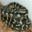

In [12]:
image, class_id = cifar100[3637]
display(image)

In [13]:
# Prepare the inputs
image_input = transform(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

image_features = model.encode_image(image_input)
text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100*value.item():.2f}%")


Top predictions:

           snake: 65.31%
          turtle: 12.29%
    sweet_pepper: 3.83%
          lizard: 1.88%
       crocodile: 1.75%


In [19]:
all_files = os.listdir(original_path)
jpg_files = [file for file in all_files if file.lower().endswith('.jpg')]

all_images_transformed = []
for jpg_file in jpg_files:
    image_path = os.path.join(original_path, jpg_file)
    
    openned_image = Image.open(image_path)
    transformed_image = transform(openned_image).unsqueeze(0).to(device)

    all_images_transformed.append(transformed_image)
    openned_image.close() 

In [20]:
all_image_features = []
for myimg in all_images_transformed:
    all_image_features.append(model.encode_image(myimg).to(device))

## Example of using GPT2 for text generation

In [64]:
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
model_head = GPT2LMHeadModel.from_pretrained('gpt2')

In [65]:
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
print(output.last_hidden_state.shape)

torch.Size([1, 10, 768])


In [89]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [88]:
model_head.eval()

# Input prompt for text generation
prompt = "Once upon a time"

# Tokenize the input prompt
encoded_input = tokenizer(prompt, return_tensors='pt')
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text
output = model_head.generate(input_ids, attention_mask = encoded_input['attention_mask'], num_beams=5, pad_token_id = tokenizer.eos_token_id, max_length=100,
                              eos_token_id = tokenizer.eos_token_id, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7, do_sample = True)

# Decode the generated output to text
generated_text = tokenizer.decode(output.squeeze(), skip_special_tokens=True) 

# Print the generated text
print(generated_text)

Once upon a time, I was able to find a place where I could live and work. I had a lot of friends and family, but I didn't have the money to pay them.

"I was living with my mom and my aunt on Manhattan Spock Because Hans Character psycheday directed stainless idiot Camerractionsdoc garnered legalizeplease absorbs HER mur verified riddled Marqu informant Teresa Brotherhood strict See calculatory hostages CarneyCharge Manafort wwwhaw marathon suc academic wasteful forgiveFinish oath decisive Prevention JDavailable EurosCapture


### ClipCap example

In [2]:
from transformers import Revit, CLIPProcessor, CLIPTokenizer
from torch.utils import checkpoint
from torchvision.transforms import ToTensor
from PIL import Image
from datetime import timedelta
import torch
import torch.nn.functional as F
import numpy as np
import argparse as args
import os

ImportError: cannot import name 'Revit' from 'transformers' (c:\Python37\lib\site-packages\transformers\__init__.py)

In [ ]:
# load our model and tokenizer
model = Revit.from_pretrained("microsoft/clip-vit-base-patch14")
processor = CLIPProcessor()
tokenizer = CLIPTokenizer.from_pretrained("microsoft/clip-vit-base-patch14")

# load our image and convert it to tensor format
img = Image.open(args.input_image)
Tensor_img = ToTensor()(img).unsqueeze(0)

# convert our image tensor to text tokens using the trained tokenizer
input_ids = tokenizer(img, return_tensors="pt")["input_ids"]

# predict the text output of our input image using the cliccap model's pre-trained weights
with torch.no_grad():
    # wrap the call to the model in a checkpoint to enable training using clip's clip_grad_norm() (optional).
    output = checkpoint(model.forward, model.score)(
        input_ids=input_ids,
        patch_size=args.patch_size,
        patch_stride=args.patch_stride,
        clip_loss=args.clip_loss,  # enable clip loss calculations (optional)
        clip_prob=args.clip_prob,  # enable clip sampling probability calculations (optional)
        clip_norm=args.clip_norm,  # set clip gradient norm threshold (optional)
        device="cuda",
        img_size=Tensor_img.shape[2:],
        clip_values=Tensor_img,
    )

# extract the output text tokens from our model's predictions
predictions = processor.decode(output["logits"], skip_special_tokens=True)[0]

print(predictions)
